This notebook demonstrates the use of the trained convolutional neural network to classify images. Start by importing the relevant packages. 

In [1]:
# NOTE: Issues may occur with CUDA if not enough memory is available.

# Import relevant packages
import os
from glob import glob

import numpy as np
from PIL import Image
from tqdm import tqdm
import matplotlib # used to save images

from deployment import Segmenter # local module for segmentation

Next, let us define a function that iterates through the images and applies the classifier. 

In [2]:
# Define iterative segmentation function
def iterateSegmentation(image_paths, device="cpu"):

    # Create a Segmenter object.
    segmenter = Segmenter(device=device)

    # Create an empty list to store the masks.
    masks = []
    # Iterate the image paths.
    for image_path in tqdm(image_paths):
        # Load an image and convert it to an RGB array.
        image = np.asarray(Image.open(image_path).convert("RGB"))

        # Segment the image.
        mask = segmenter.segment_image(image)

        # Store the mask in the list of masks.
        masks.append(mask)
        
    return masks

Next, let us specify paths to the input images, which are specified using the image_paths varible. By default, this code will consider the images in the text/ folder. Finish this section by applying the above-defined function.

In [3]:
# Gather paths of images to be segmented.
data_dir = os.path.join("tests/") # for test images
# data_dir = os.path.join("data/") # OR for images in data/ folder
image_paths = glob(os.path.join(data_dir, "*.*"))

# Show the user the names of the images beign segmented.
print('image_paths = ')
print(image_paths)

# When segmenting many images, it may be advisable to use a GPU.
device = "cuda"

# Perform the segmentation.
masks = iterateSegmentation(image_paths, device)
    
print('Complete.')

image_paths = 
['tests\\20180529_A9_003.TIF', 'tests\\20180529_A9_011.TIF', 'tests\\201805A_A6_004.TIF', 'tests\\Case1_E7_025.TIF', 'tests\\Case4_D8_007.TIF', 'tests\\RU_FI_A10_004.TIF', 'tests\\test_image.png']


100%|██████████| 7/7 [00:08<00:00,  1.25s/it]

Complete.


Now, visualize the result using the viz_binaries function, imported from the visualization module. This will generate a grid of images for the results. 

Sample segmented images:


<Figure size 432x288 with 0 Axes>

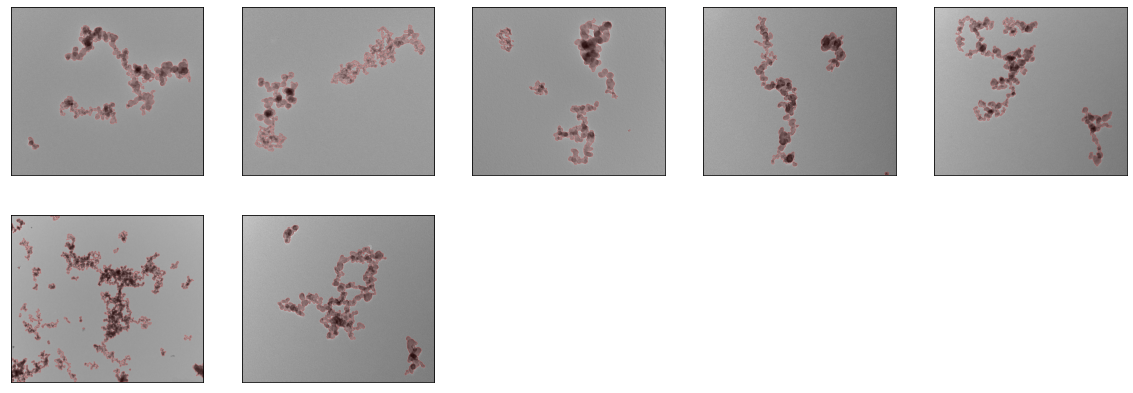

In [4]:
#== Show segmented binary images =================================%
from visualization import viz_binaries

print('Sample segmented images:')

# function to loop through and load images
viz_binaries(masks, image_paths) # run above function

Finally, save the images to the results folder. 

In [5]:
#== Ouput binary images by saving to the results folder ==========#
import ntpath # import an extra package used to get file names

ii = 0
for image_path in tqdm(image_paths):
    _, tail = ntpath.split(image_path)
    matplotlib.image.imsave('results/' + tail, masks[ii], format='tiff')
    ii = ii+1

print('Complete: Images saved to results/ folder.')

100%|██████████| 7/7 [00:01<00:00,  4.63it/s]

Complete: Images saved to results/ folder.
